In [268]:
# 必要なパッケージとデータのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

df = pd.read_excel('Supplemental_Table_S2.xls')
df

,Cell,Antibody,total read number,nonredundant read,redundant read,complexity,depth,Genome coverage,GC,FRiP (MACS2),...,SSP-RSC,Background uniformity,FCS,Q-RSC,JSD,PPQT-NSC,PPQT-RSC,PPQT-Qtag,MACS2 peaks,DROMPA peaks
0,E003,H3K27ac,21502554,21391238 (99.5%),111316 (0.5%),0.998,1.26,0.68,49,0.2021,...,1.363140,1.09253,0.496900,1.742,0.360201,1.221092,1.526650,2.0,68611,22397
1,E004,H3K27ac,30000000,29706394 (99.0%),293606 (1.0%),0.997,1.75,0.74,52,0.2090,...,1.184260,1.06470,0.431716,1.394,0.367367,1.168355,1.281552,1.0,78944,23341
2,E005,H3K27ac,30000000,29698612 (99.0%),301388 (1.0%),0.997,1.75,0.74,51,0.1965,...,1.098210,1.04263,0.445636,1.190,0.362768,1.157160,1.084254,1.0,68912,21516
3,E006,H3K27ac,30000000,29744493 (99.1%),255507 (0.9%),0.997,1.75,0.76,50,0.2292,...,1.203240,1.09318,0.454843,1.435,0.362597,1.180057,1.327205,1.0,81094,26560
4,E007,H3K27ac,30000000,29623085 (98.7%),376915 (1.3%),0.995,1.75,0.80,49,0.0637,...,1.049670,1.10472,0.234771,1.084,0.276481,1.070251,0.924231,0.0,25710,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,E125,Input,30000000,30000000 (100.0%),0 (0.0%),1,1.77,0.87,45,0.0013,...,0.957233,1.14108,0.039721,0.920,0.212654,1.016054,0.857049,0.0,379,744
856,E126,Input,16806474,16806474 (100.0%),0 (0.0%),1,0.99,0.70,45,0.0042,...,1.141200,1.15005,0.152653,1.234,0.233434,1.066987,1.197045,1.0,836,2008
857,E127,Input,20364549,20364549 (100.0%),0 (0.0%),1,1.20,0.80,45,0.0037,...,0.485702,1.15766,0.204078,0.850,0.210048,1.012264,0.268751,-1.0,550,2092
858,E128,Input,12868984,12868984 (100.0%),0 (0.0%),1,0.76,0.66,45,0.0029,...,0.407191,1.14904,0.146981,0.860,0.210967,1.013456,0.238210,-2.0,335,8823


## お題１：下の図を作成するコードを考える。

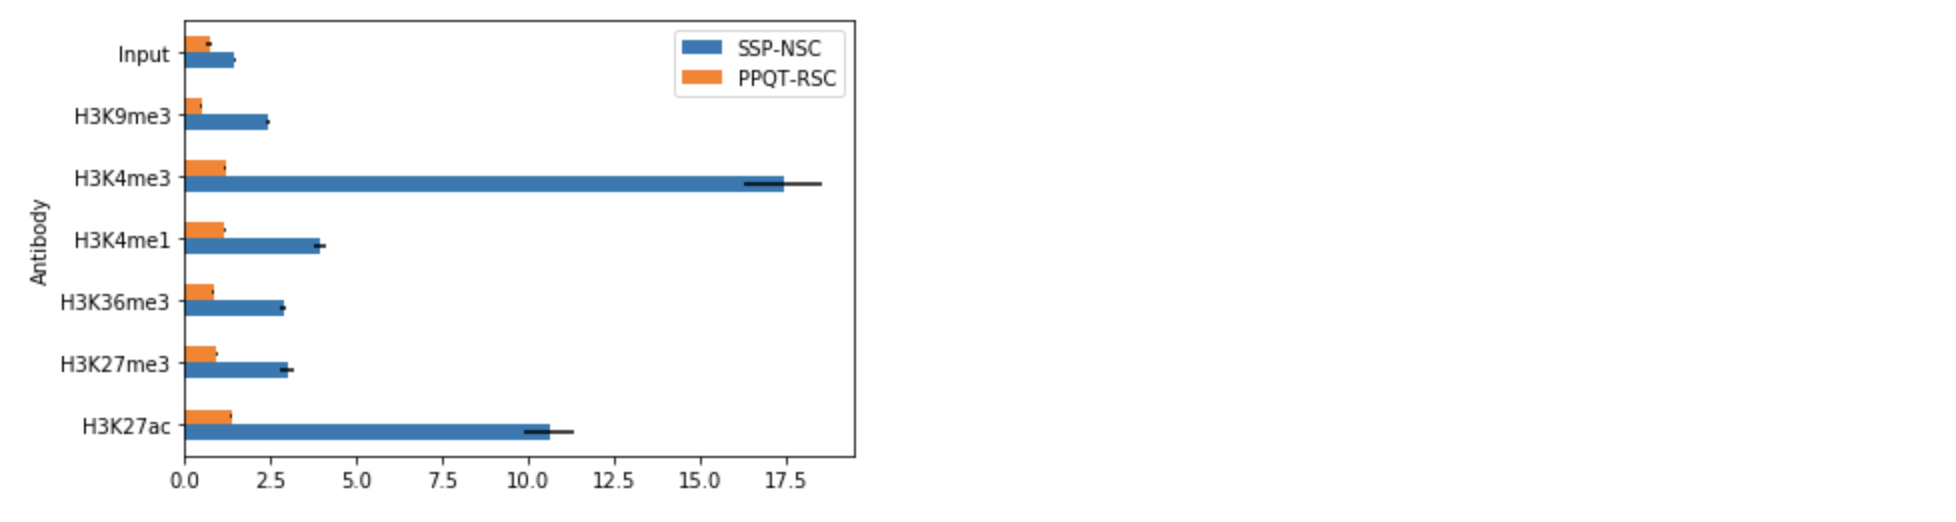

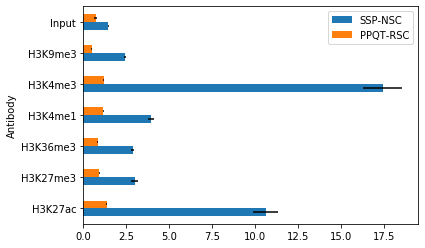

In [21]:
grouped = df.groupby('Antibody')

def plot_bars(grouped_df, col_list):
    
    group_val = grouped_df[col_list] # extract only plot data

    sem = group_val.std()/np.sqrt(group_val.count()) # get error bar
    ax = group_val.mean().plot(kind='barh', xerr=sem) # plot fig
    return ax

ax = plot_bars(grouped, ["SSP-NSC","PPQT-RSC"])

## to save as png

# fig = ax.get_figure()
# fig.tight_layout()
# fig.savefig('test.png')

## お題２；お題１で作った図について、エラーバーを標準誤差（SEM）から信頼区間（CI）に変更する。

ci: (array([[ 9.18751141,  1.32599496],
       [ 2.60191718,  0.8741524 ],
       [ 2.72843526,  0.78621651],
       [ 3.59389628,  1.12616008],
       [15.20287877,  1.15759772],
       [ 2.2739102 ,  0.45617097],
       [ 1.38183635,  0.54964661]]), array([[12.06947002,  1.43533666],
       [ 3.40109699,  1.02317458],
       [ 3.02946426,  0.88789825],
       [ 4.32274829,  1.20217867],
       [19.66014832,  1.20729407],
       [ 2.57957625,  0.56166319],
       [ 1.52181515,  0.92302251]]))
mean:             SSP-NSC  PPQT-RSC
Antibody                     
H3K27ac   10.628491  1.380666
H3K27me3   3.001507  0.948663
H3K36me3   2.878950  0.837057
H3K4me1    3.958322  1.164169
H3K4me3   17.431514  1.182446
H3K9me3    2.426743  0.508917
Input      1.451826  0.736335
sem:            SSP-NSC  PPQT-RSC
Antibody                    
H3K27ac   0.726035  0.027546
H3K27me3  0.201918  0.037651
H3K36me3  0.076057  0.025691
H3K4me1   0.184149  0.019207
H3K4me3   1.126159  0.012556
H3K9me3   0.07722

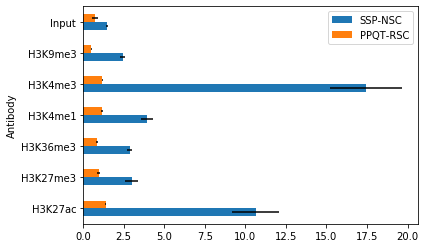

In [82]:
from scipy import stats

def set_ci_range(df, sem):
    # t分布を仮定した場合の信頼区間
    ci = stats.t.interval(alpha = 0.95,          # 信頼区間
                      df = df.count()-1, # 自由度
                      loc = df.mean(),            # 標本平均
                      scale = sem)           # 標準誤差
    # return of ci:
    # ci[0] array([[SSP-NSC[0]_ci下界, PPQT-RSC[0]_ci下界],[...]]),
    # ci[1] array([[SSP-NSC[0]_ci上界, PPQT-RSC[0]_ci上界],[...]])
    
    print("ci:", ci)
    print("mean:", df.mean())
    
    # ciはタプルオブジェクトなので、semと同じようにデータフレームにする
    # エラーバーはプロットしてる平均から伸ばしたい距離分を記述する必要がある。平均から引いた値を計算した。
    ci_d = pd.DataFrame(df.mean() - ci[0], index = sem.index, columns = sem.columns) #下界
    ci_u = pd.DataFrame(ci[1] - df.mean(), index = sem.index, columns = sem.columns) #上界

    print("sem:", sem)
    print("lower:", ci_d)
    print("upper:", ci_u)
    
    ci_nsc = pd.DataFrame([ci_d["SSP-NSC"], ci_u["SSP-NSC"]])
    ci_rsc = pd.DataFrame([ci_d["PPQT-RSC"], ci_u["PPQT-RSC"]])
    
    # (2, 2, 7)のシェイプにしないといけない -> (2: col, 2: 下界/上界, 7: ChIP)
    ci_block = np.block([[[ci_nsc]], [[ci_rsc]]])
    
    print(ci_block.shape)
    
    return ci_block


def plot_bars(grouped_df, col_list):
    
    group_val = grouped_df[col_list] # extract only plot data

    sem = group_val.std()/np.sqrt(group_val.count()) # get error bar
    ci_block = set_ci_range(group_val, sem)
    
    ax = group_val.mean().plot(kind = 'barh', xerr = ci_block) # plot fig
    return ax

ax = plot_bars(grouped, ["SSP-NSC","PPQT-RSC"])

## お題３：logスケールboxplotで外れ値を非表示にするオプションを調べる。
### 問：外れ値を表示した方がよい場合と、非表示にした方がよい場合はそれぞれどのようなケースか。

→　表示の場合：外れ値を表示した方が、データの分布をより正確に見ることができる。  
　　非表示の場合：図がすっきりするため、項目間の比較がわかりやすい。

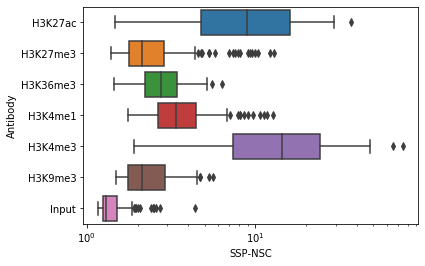

In [88]:
# scaleをlogに
f, ax = plt.subplots(figsize=(6, 4))
ax.set_xscale("log")
sns.boxplot(data=df, x='SSP-NSC', y='Antibody')

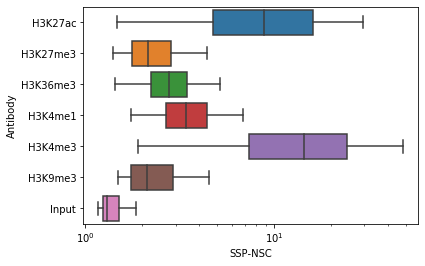

In [101]:
# scaleをlogに
f, ax = plt.subplots(figsize=(6, 4))
ax.set_xscale("log")
sns.boxplot(data=df, x='SSP-NSC', y='Antibody', sym="")
# sym : str, optional
#     The default symbol for flier points. 
#     Enter an empty string ('') if you don't want to show fliers.
#     (fliers = points representing data that extend beyond the whiskers.)
#     If None, then the fliers default to 'b+' If you want more control use the flierprops kwarg.

# Another way
# sns.boxplot(data=df, x='SSP-NSC', y='Antibody', showfliers = False)
# showfliers : bool, optional (True)
#    Show the outliers beyond the caps.

## お題４：logスケールboxplotをviolin plotに変更する。
### 問：boxplotが望ましい場合とviolin plotが望ましい場合の例を考える。

→ boxplot：単純にわかりやすい。  
    violin plot：データの分布が二つ山ができてる時などが視覚的にわかる。

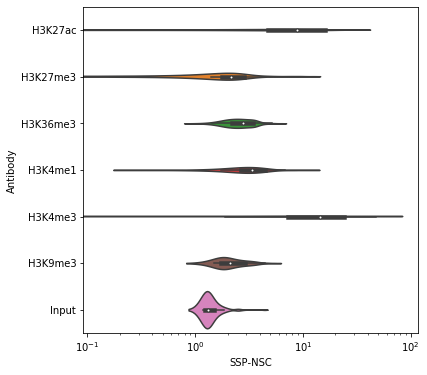

In [92]:
f, ax = plt.subplots(figsize=(6, 6))
ax.set_xscale("log")
sns.violinplot(data=df, x='SSP-NSC', y='Antibody')

## お題５：SSP_Fig2Bを自分で作成してみる。

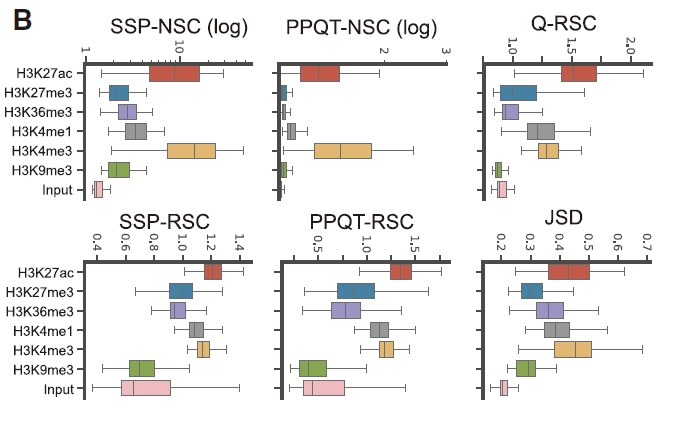

##### sns.catplot()で、複数のbooxplotが一行でプロットできるらしいので、試した。  

plotの時に必要だった処理
- log：同じinputデータフレームの中でcolに入ったカテゴリーごとに作図するため、対数軸をplotの時に決められなかった。log変換したものをplotした→ map(math.log10)
- 入力データフォーマットの変更：縦長のデータでないといけない。→　pd.melt()

できなかったところ
- x軸の移動
- 対数軸

     Antibody         score     value
0     H3K27ac  SSP-NSC(log)  0.758369
1     H3K27ac  SSP-NSC(log)  0.666976
2     H3K27ac  SSP-NSC(log)  0.655025
3     H3K27ac  SSP-NSC(log)  0.708116
4     H3K27ac  SSP-NSC(log)  0.369346
...       ...           ...       ...
5155    Input           JSD  0.212654
5156    Input           JSD  0.233434
5157    Input           JSD  0.210048
5158    Input           JSD  0.210967
5159    Input           JSD  0.206593

[5160 rows x 3 columns]


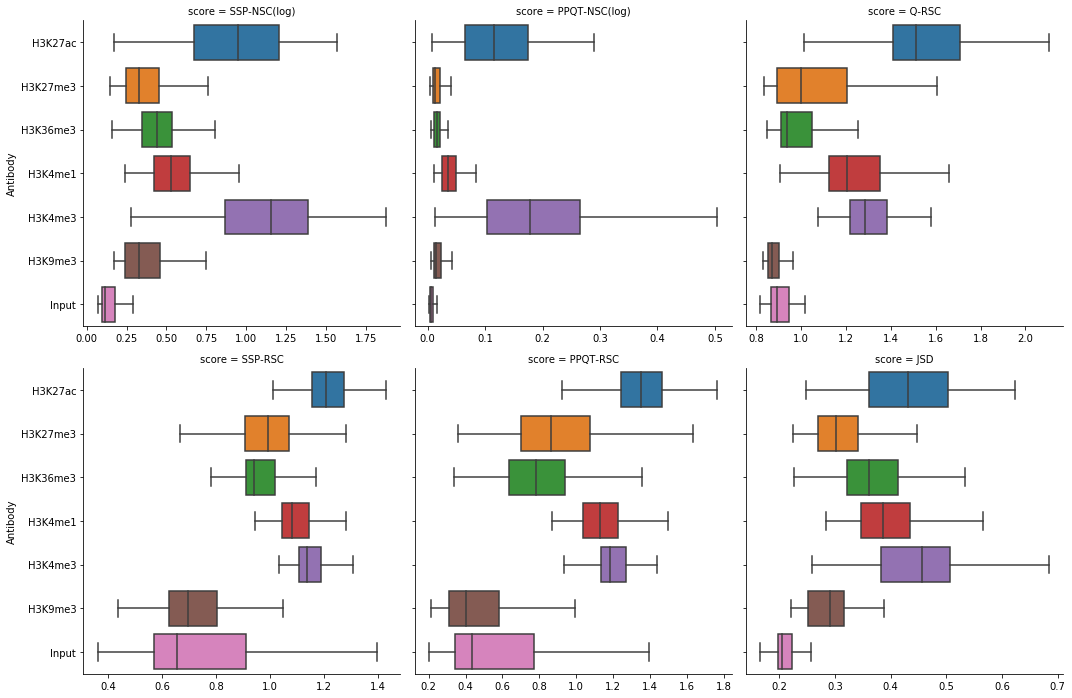

In [271]:
# logの計算
df["SSP-NSC(log)"] = df['SSP-NSC'].map(math.log10)
df["PPQT-NSC(log)"] = df['PPQT-NSC'].map(math.log10)

# 入力データフォーマットの編集　横長→縦長
plot_cols = ["SSP-NSC(log)","PPQT-NSC(log)","Q-RSC","SSP-RSC","PPQT-RSC","JSD"]　# カラム選択
s = pd.melt(df, id_vars=["Antibody"], var_name="score", value_vars=plot_cols) # 横長→縦長
print(s)

# seabornによる複数グラフの作図
g = sns.catplot(y="Antibody", x="value", col="score", data=s,
                col_wrap=3, kind="box", sharex = False, sym="")
g.set(xlabel ="")

##### データフォーマットを変更するのはややこしかったのと、対数軸表示にできなかったので、別の方法を試した。  

手順：
1. サブプロットを作図する関数で、対数軸表示やグラフの見た目を設定する。
2. 指定したカラムからサブプロットを作図し、一枚の図に配置する。

できなかったところ
- y軸を一番左だけにする。→ sns.catplot()では自動でこれをやってくれている。
- PPQT-NSC(log)のx軸がタイトルとぶつかるからか、90度曲がらなかった。

0 0 0 log
0 1 1 log
0 2 2 
1 0 3 
1 1 4 
1 2 5 


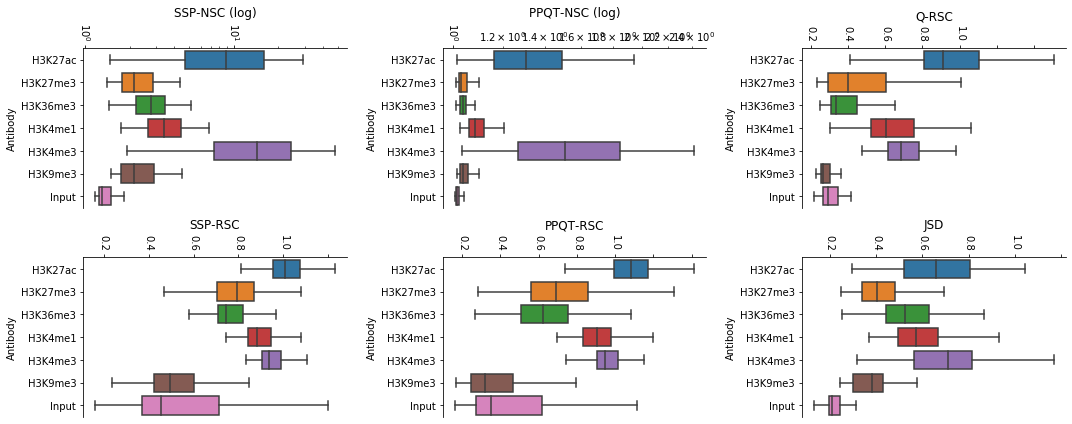

In [277]:
# 一つのサブプロットの作図
def boxplot_by_col(df, col, axs, log="log"):
    """
    df:    input DataFrame
    col:    selected column list
    axs:    position in figure
    log:    list of "log" or not. Default = "log".
    """
    
    f = sns.boxplot(data=df, x=col, y='Antibody', sym="", ax=axs)
    f = sns.despine(bottom=True,top=False, ax=axs) # 軸：下を消して上を表示する
    
    axs.set_xticklabels(axs.get_xticklabels(), rotation=-90)
    axs.set(xlabel ="")
    
    if log == "log":
        axs.set_xscale("log") # logの時、対数軸にする
        axs.set_title("{} (log)".format(col)) # logの時、サブタイトルにlogを付け足す
        
    else:
        axs.set_title("{}".format(col))
        
    return f

# 全体の作図
def some_plots(subplot_row, subplot_col, df, plot_cols, logs, figsize=(10, 8)):
    """
    subplot_row:    Number of how meny rows in figure.
    subplot_col:    Number of how meny column in figure.
    df:    input DataFrame
    plot_cols:    selected column list
    logs:   list of "log" or not.
    figsize:   size of figure. Default = (10, 8).
    """
    
    f, axs = plt.subplots(subplot_row, subplot_col, figsize=figsize)
    
    i = 0
    
    for row in range(subplot_row):
        
        for col in range(subplot_col):
            
            # 指定したplot_colsでplot；サブプロットの配置を自動で決める；
            g = boxplot_by_col(df, plot_cols[i], axs[row, col], logs[i])
            f.tight_layout()
            
            # 確認のために、配置（axs[row, col]）と順番とlogかどうかを出力。
            print(row, col, i, logs[i])
            i += 1
        
    return 
        
# 実行    
plot_cols = ["SSP-NSC","PPQT-NSC","Q-RSC","SSP-RSC","PPQT-RSC","JSD"]
logs = ["log", "log", "", "", "", ""]

some_plots(2, 3, df, plot_cols, logs, figsize=(15,6))


結果、６つの値を同じ図に表示することはできたが、どちらにしろ見た目はおしい。

## お題６：H3K36me3, Input についてそれぞれ相関係数ヒートマップを描き、Antibodyごとの傾向の違いを観察する。

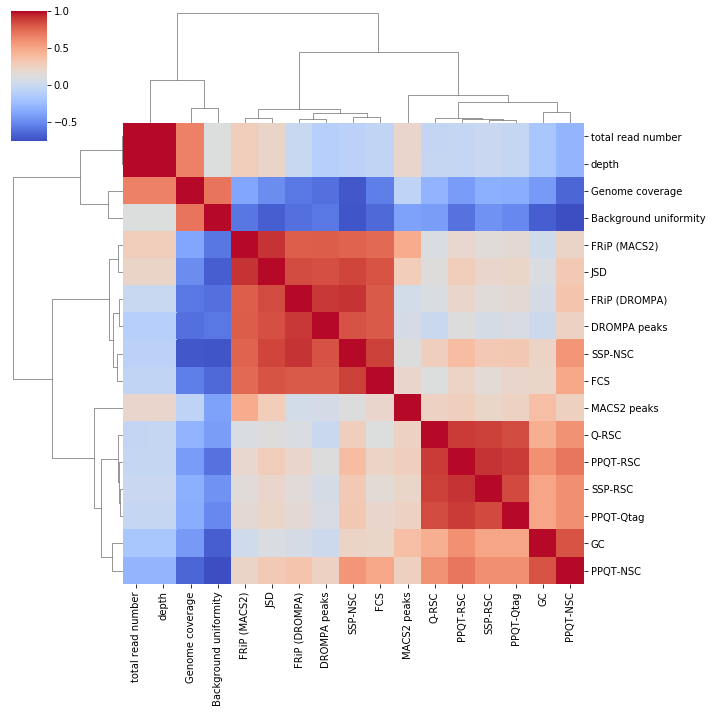

In [282]:
df = pd.read_excel('Supplemental_Table_S2.xls')
cmap = sns.color_palette("coolwarm", 200)
df_36me3 = df[df['Antibody'] == 'H3K36me3']
sns.clustermap(df_36me3.corr(), method='ward', cmap=cmap)

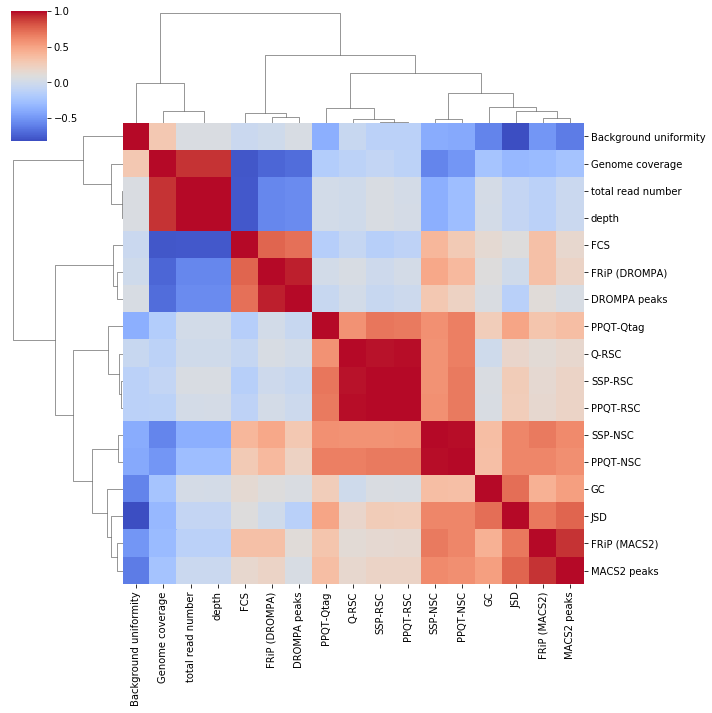

In [283]:
df_input = df[df['Antibody'] == 'Input']
sns.clustermap(df_input.corr(), method='ward', cmap=cmap)